In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

import pickle

In [2]:
#Load Bitcoin Price History
with open('../crypto_currency_and_market_value_history/data/bitcoin_4_year_hourly_history_df.pickle', 'rb') as file:
     bitcoin_2_5_year_price_hist_df = pickle.load(file)

In [3]:
bitcoin_2_5_year_price_hist_df.head(5)

,timestamp,open,high,low,close,volume (btc),volume (currency),weighted price
0,2015-05-31 00:00:00,232.11,232.11,231.92,231.92,223.37,51822.18,232.00
1,2015-05-31 01:00:00,231.88,232.32,231.87,232.32,217.49,50452.68,231.98
2,2015-05-31 02:00:00,231.97,232.51,231.88,232.51,46.45,10782.23,232.14
3,2015-05-31 03:00:00,232.49,232.49,231.93,232.49,8.85,2057.04,232.38
4,2015-05-31 04:00:00,232.49,232.49,231.90,232.22,14.78,3429.00,232.05


In [4]:
df = bitcoin_2_5_year_price_hist_df[bitcoin_2_5_year_price_hist_df.timestamp > '2017-01-01 00:00:00'][['timestamp','close']]

In [6]:
df = df.set_index('timestamp')
df.head(5)

,close
timestamp,
2017-01-01 01:00:00,963.87
2017-01-01 02:00:00,963.97
2017-01-01 03:00:00,962.83
2017-01-01 04:00:00,963.46
2017-01-01 05:00:00,964.00


In [7]:
from fbprophet import Prophet

In [14]:
ml_df = df.reset_index().rename(columns={'timestamp':'ds', 'close':'y'})
ml_df['y'] = np.log(ml_df['y'])
ml_df
model = Prophet()
model.fit(ml_df);
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

C:\Users\moham\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



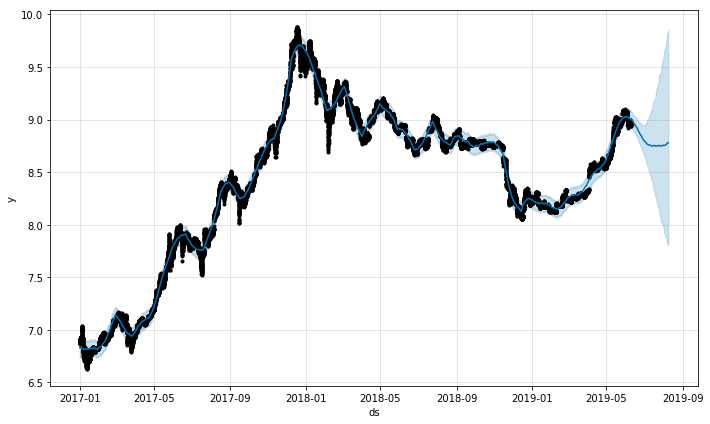

In [15]:
figure = model.plot(forecast)

TypeError: float() argument must be a string or a number, not 'Period'

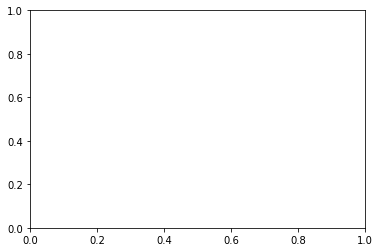

In [16]:
two_years = forecast.set_index('ds').join(df)
two_years = two_years[['close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)
two_years[['close', 'yhat']].plot()

In [ ]:
two_years_AE = (two_years.yhat - two_years.Close)
two_years_AE.describe()

In [ ]:
from sklearn.metrics import *

mean_squared_error(two_years.Close, two_years.yhat)

In [ ]:
mean_absolute_error(two_years.Close, two_years.yhat)

In [ ]:
r2_score(two_years.Close, two_years.yhat)

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(two_years.Close)
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)
 
ax1.set_title('Actual (Blue) vs Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

In [ ]:
full_df = forecast.set_index('ds').join(df)
full_df['yhat']=np.exp(full_df['yhat'])
 
fig, ax1 = plt.subplots()
ax1.plot(full_df.Close)
ax1.plot(full_df.yhat, color='black', linestyle=':')
ax1.fill_between(full_df.index, np.exp(full_df['yhat_upper']), np.exp(full_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Actual vs Forecasted with Confidence Bands')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
 
L=ax1.legend() #get the legend
L.get_texts()[0].set_text('Actual') #change the legend text for 1st plot
L.get_texts()[1].set_text('Forecasted') #change the legend text for 2nd plot